## Time series analysis

### Topics(keywords):
- Time series decomposition (Original, Trend, Seasonal, Residual parts)
- How to Check if Time Series Data is Stationary
- Stationary time-series & Non-stationary time-series
- Random walk

Analysis below has taken Apple daily stock price from 2013 to 2022.

- Check following hypothesis:
1. Is the series stationary?
2. Is the series a randomwalk?

For purpose of analysis, the closing price of shares were downloaded from finance.yahoo.com
https://www.nasdaq.com/market-activity/stocks/aapl/historical

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd
!ls

/content
drive  sample_data


In [4]:
df = pd.read_csv("/content/drive/My Drive/data/HistoricalData_apple.csv")

In [5]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/06/2022,$142.91,64727190,$147.075,$147.3,$141.92
1,12/05/2022,$146.63,68826440,$147.77,$150.9199,$145.77
2,12/02/2022,$147.81,65447450,$145.96,$148,$145.65
3,12/01/2022,$148.31,71250420,$148.21,$149.13,$146.61
4,11/30/2022,$148.03,111380900,$141.395,$148.72,$140.55


In [6]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2511,12/14/2012,$18.2069,1008461037,$18.3839,$18.5047,$18.0564
2512,12/13/2012,$18.9175,623887070,$18.9697,$19.2014,$18.7786
2513,12/12/2012,$19.25,486520525,$19.5632,$19.5714,$19.1525
2514,12/11/2012,$19.3353,591282763,$19.2775,$19.6272,$19.1918
2515,12/10/2012,$18.9222,629910708,$18.75,$19.2325,$18.6279


We have select Apple stock price from last 10 years for time-series analysis. We can use stock open, high, low and close price for analysis. Here, we are using open price. Additonally, we see '$' symbol needs to be striped. Further, we need to convert date column into datatime data type
Lets do it.

In [7]:
df_ts = df[["Date", "Open"]]
df_ts.shape

(2516, 2)

In [8]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2516 non-null   object
 1   Open    2516 non-null   object
dtypes: object(2)
memory usage: 39.4+ KB


In [9]:
df_ts.Open = df_ts.Open.str.lstrip("$") # remove $ symbol from prefix
df_ts.Open = df_ts.Open.astype(float)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
df_ts.head()

,Date,Open
0,12/06/2022,147.075
1,12/05/2022,147.770
2,12/02/2022,145.960
3,12/01/2022,148.210
4,11/30/2022,141.395


In [11]:
"""
Change string to datetime format
"""
df_ts.Date = pd.to_datetime(df_ts.Date)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
df_ts.head()

,Date,Open
0,2022-12-06,147.075
1,2022-12-05,147.770
2,2022-12-02,145.960
3,2022-12-01,148.210
4,2022-11-30,141.395


In [13]:
df_ts["Month"] = df_ts.Date.dt.month
df_ts["Year"] = df_ts.Date.dt.year

<ipython-input-13-dcf0bce9cc4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Month"] = df_ts.Date.dt.month
<ipython-input-13-dcf0bce9cc4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Year"] = df_ts.Date.dt.year


In [14]:
df_ts.head()

,Date,Open,Month,Year
0,2022-12-06,147.075,12,2022
1,2022-12-05,147.770,12,2022
2,2022-12-02,145.960,12,2022
3,2022-12-01,148.210,12,2022
4,2022-11-30,141.395,11,2022


In [ ]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2516 non-null   datetime64[ns]
 1   Open    2516 non-null   float64       
 2   Month   2516 non-null   int64         
 3   Year    2516 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 78.8 KB



## Visualize time series data

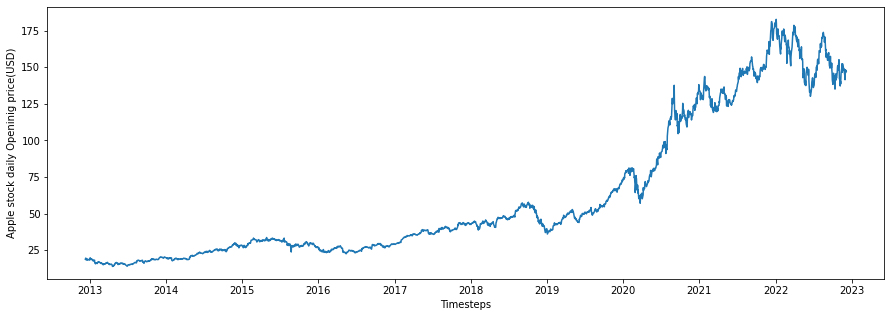

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_ts.Date, df_ts.Open)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Apple stock daily Openinig price(USD)")

plt.show()

#### Conclusion
Apple stock price has a clear trend over the last 10 years. Lets check if its stationary or non-stationary using ADF(Augement Dickey fuller test) from statsmodel

### Decompose the time-series data

In [63]:
res_decomposition = STL(df_ts.Open, period=30).fit()

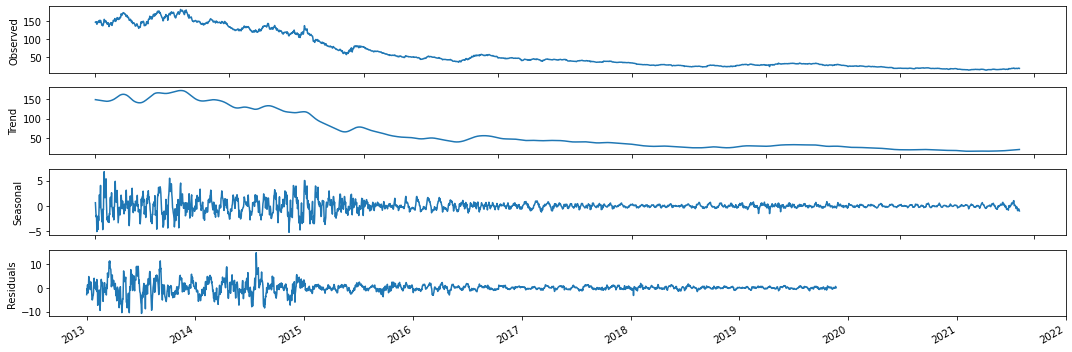

In [64]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(15,5))

ax[0].plot(res_decomposition.observed)
ax[0].set_ylabel('Observed')

ax[1].plot(res_decomposition.trend)
ax[1].set_ylabel('Trend')

ax[2].plot(res_decomposition.seasonal)
ax[2].set_ylabel('Seasonal')

ax[3].plot(res_decomposition.resid)
ax[3].set_ylabel('Residuals')

# Set x ticker for 10 years, i.e. 3650 days at interval of 365 days each year.
plt.xticks(np.arange(0, 3650, 365), labels =[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


fig.autofmt_xdate()
plt.tight_layout()

## Stationarity test Augment Dickey Fuller test

In [66]:
ADF_stats = adfuller(df_ts.Open)

In [73]:
"""
Where to find ADF statistics & p-value

Output: 
(-1.444115914569682, #ADF statistics: A time series is stationary if ADF-stats is large-ve number.
 0.5609533501868397, # p-value (discard null hypothesis if p < 0.05)
 22,
 2493,
 {'1%': -3.4329757705711432,
  '5%': -2.862700050059295,
  '10%': -2.567387539813443},
 9329.400912601219)
"""

ADF_stats

(-1.444115914569682,
 0.5609533501868397,
 22,
 2493,
 {'1%': -3.4329757705711432,
  '5%': -2.862700050059295,
  '10%': -2.567387539813443},
 9329.400912601219)

In [68]:
## ADF Statistics
ADF_stats[0]

-1.444115914569682

In [69]:
## p-value
ADF_stats[1]

0.5609533501868397

#### Conclusion
From ADF test, we observea small -ve ADF  stats value & p value of 0.5. Therefore, the time-seres is not stationary.

## Transformation

If a given time-series is non-stationary, one needs to make it stationary by  taking 1st or 2nd difference. 
NOTE: We should not plot PCF for non-stationay time-series as it does not represent any conclusive auto-correlation. 

In [94]:
ts = np.diff(df_ts.Open, n=1)

Check for stationarity after data transformation step.

In [95]:
ADF_stats = adfuller(ts)
ADF_stats[0], ADF_stats[1]

(-10.43833950193627, 1.5452502952974613e-18)

 Now, time series is stationary based on ADF statistics shown above i.e. it has large -ver ADF stats and p value less than 0.05.

## ACF plot (1st difference transformation)

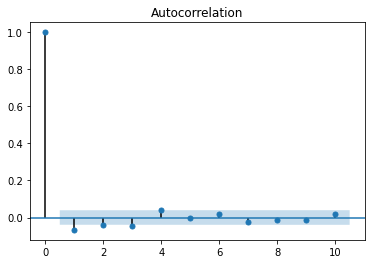

In [96]:
plot_acf(ts, lags=10);

## Conclusion:

Stationary Time series data (with 1st difference transformation) does not show auto-correlation. Therefore, it is a random-walk.

However, it is of interest to take 2nd difference transformation to the time-series and see ACF plot.

### Iteration-2 of Transformation
Take 2nd difference transformation of time-series data as 1st difference transformation did not show auto-correlation.

In [97]:
ts = np.diff(df_ts.Open, n=2) # 2nd difference

In [98]:
ADF_stats = adfuller(ts)
ADF_stats[0], ADF_stats[1]

(-15.87417035875557, 8.910454281932108e-29)

### ACF plot(2nd diff transformation)

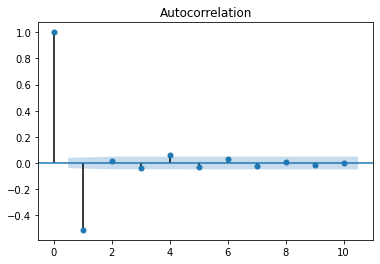

In [99]:
plot_acf(ts, lags=10);

## Conclusion:

The time-series shows Auto-correlation of order=1 after taking 2nd difference transformation. Therefore, it can be conlcuded, the time-series data is not a random walk. Hence, stats model can be used for predicting.